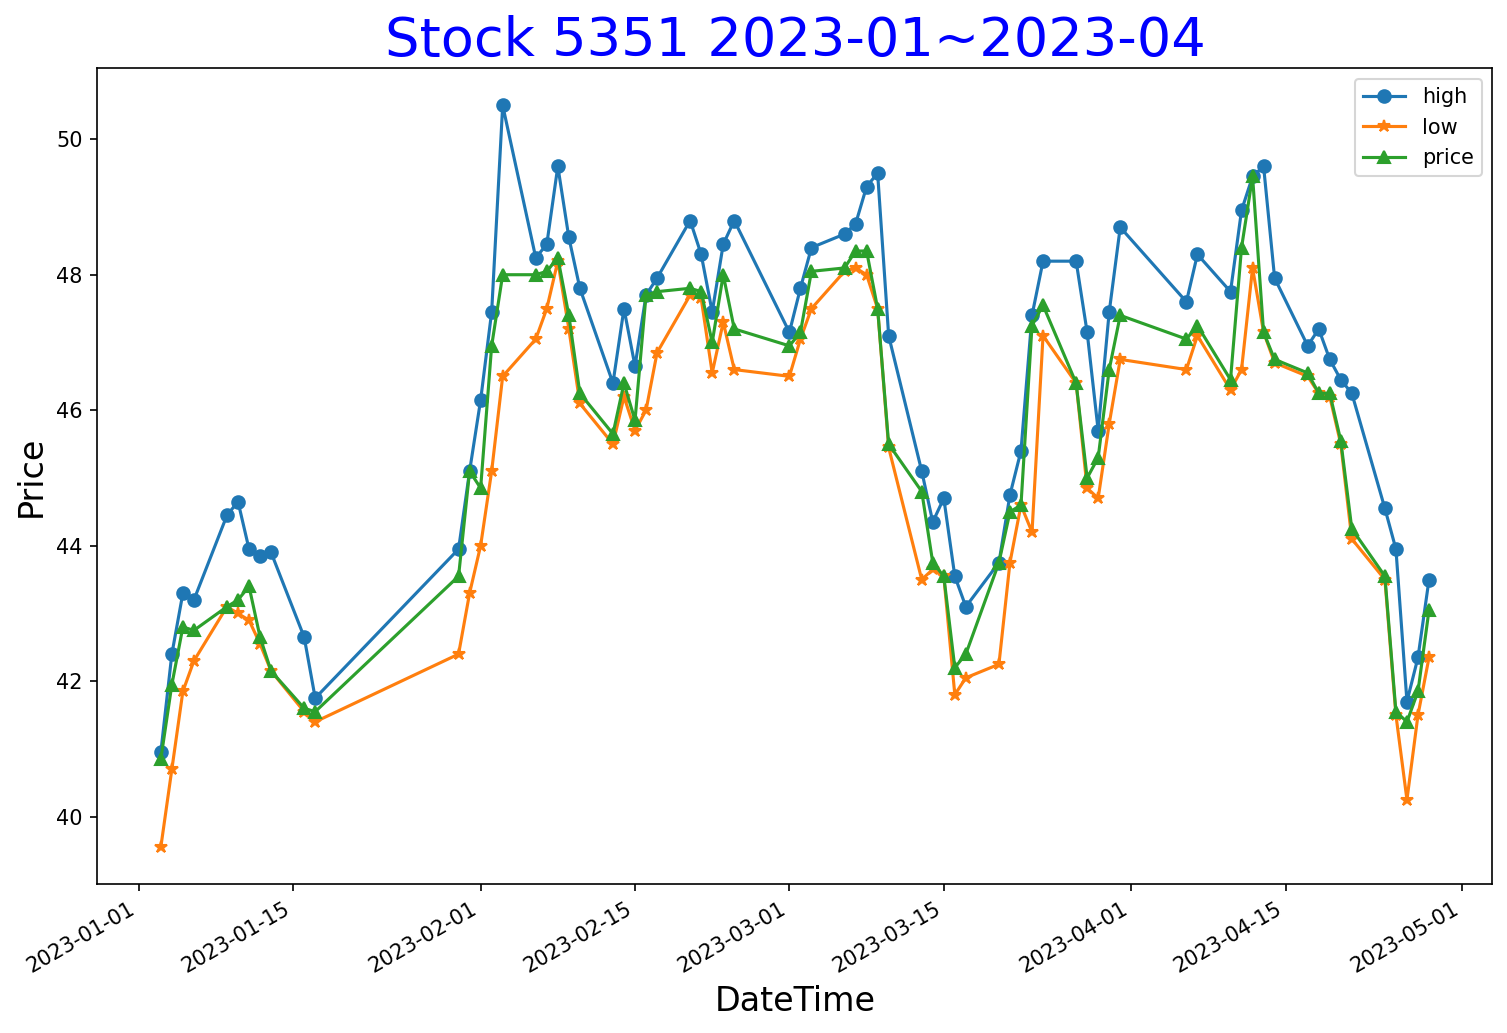

In [9]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time,csv
import matplotlib.pyplot as plt
from datetime import datetime

url = 'https://www.tpex.org.tw/web/stock/aftertrading/daily_trading_info/st43.php?l=zh-tw'

driver = webdriver.Chrome('chromedriver')
driver.implicitly_wait(10)
driver.get(url)

dates,highs,lows,prices=[],[],[],[]  #設定空串列
for i in range(4):
    date = driver.find_element(By.ID,'input_date')
    date.send_keys(Keys.CONTROL + 'a')
    date.send_keys('112/0' + str(i + 1))
    date.send_keys(Keys.ENTER)
    time.sleep(3)

    stock = driver.find_element(By.ID,'input_stock_code')
    stock.send_keys(Keys.CONTROL + 'a')
    stock.send_keys('5351')
    stock.send_keys(Keys.ENTER)
    time.sleep(3)

    csvdownload = driver.find_elements(By.CLASS_NAME,'download-csv')
    #print(len(csvdownload))
    csvdownload[1].click()
    time.sleep(3)

    path = f'C:\\Users\Wantzu\Downloads\ST43_5351_20230{i+1}.csv'
    with open(path) as csvFile:
        csvReader = csv.reader(csvFile) #讀取csv檔的動作叫csv.reader
        listCsv = list(csvReader) #將csv讀取出來的東西轉成串列

        csvData = listCsv[5:-1] #切片，去除非數據資料
        #print(csvData)
        
        #======開始彙整需要的資料: 最高、最低、收盤
        for row in csvData:
            try:
                datestr = row[0].replace('112','2023') #日期一定要用西元年
                curdate = datetime.strptime(datestr,"%Y/%m/%d") #2022-2-22 --> 2022,2,22這一行是把目前日期切開
                high = float(row[4])
                low = float(row[5])
                price = float(row[6])
                
            except Exception:
                print('資料有缺!')
            else:
                #======開始串列
                highs.append(high)
                lows.append(low)
                prices.append(price)
                dates.append(curdate)
            
#==========繪製趨勢線
fig1 = plt.figure(dpi=150,figsize=(12,8))
plt.plot(dates, highs, '-o', label='high')
plt.plot(dates, lows, '-*', label='low')
plt.plot(dates, prices, '-^', label='price')
plt.legend(loc='best')
fig1.autofmt_xdate() #日期旋轉

plt.xlabel("DateTime",fontsize=16)
plt.ylabel("Price",fontsize=16)
plt.title("Stock 5351 2023-01~2023-04",fontsize=26, color='blue')

plt.show()